<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/03.01-Chau-Ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows how to use functions from `sympy`, `control` and `matplotlib` to substitute MATLAB functions used in [Chapter 2](https://ia802909.us.archive.org/32/items/process-control-a-first-course-with-matlab/Process%20Control%20A%20First%20Course%20with%20MATLAB.pdf#page=22) of Pao C. Chau, Process Control: A First Course with MATLAB.

In [59]:
from sympy import apart, inverse_laplace_transform, Heaviside, plot, exp
from sympy.abc import s, t
from sympy.physics.control.lti import TransferFunction
import numpy as np
!pip install control
from control.matlab import *
import matplotlib.pyplot as plt

     |████████████████████████████████| 357 kB 5.6 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=0bfac7ed84f9462424feb71ac23a08960657c64dfb1871214f912bcd6b4914ce
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


Let's take the transfer function of the Example 2.3.

In [7]:
# Example 2.3, p. 15
# F(s) = (6*s**2 − 12)/(s**3 + s**2 - 4*s - 4)
tf23 = TransferFunction(6*s**2 - 12, s**3 + s**2 - 4*s - 4, s)
tf23

TransferFunction(6*s**2 - 12, s**3 + s**2 - 4*s - 4, s)

Its poles (roots of the denominator polynomial) are easily calculated as follows:

In [8]:
tf23.poles()

[-2, -1, 2]

The partial fraction expansion of this transfer function can also be easily obtained as follows:

In [9]:
# Example 2.4, p. 16
# F(s) = (6*s**2 − 12)/(s**3 + s**2 − 4*s − 4)
pftf23 = apart(tf23.args[0]/tf23.args[1])
pftf23

3/(s + 2) + 2/(s + 1) + 1/(s - 2)

And then, we can apply the inverse Laplace transform to obtain the time domain function.

In [10]:
inverse_laplace_transform(pftf23, s, t).expand()

exp(2*t)*Heaviside(t) + 2*exp(-t)*Heaviside(t) + 3*exp(-2*t)*Heaviside(t)

The same procedure can be applied to the Example 2.5.

In [25]:
# Example 2.5, p. 17
# F(s) = (6*s)/(s**3 + s**2 − 4*s − 4)
tf25 = TransferFunction(6*s, s**3 + s**2 - 4*s - 4, s)
tf25

TransferFunction(6*s, s**3 + s**2 - 4*s - 4, s)

In [35]:
pftf25 = apart(tf25.args[0]/tf25.args[1])
pftf25

-3/(s + 2) + 2/(s + 1) + 1/(s - 2)

In [45]:
inverse_laplace_transform(pftf25, s, t).expand()

exp(2*t)*Heaviside(t) + 2*exp(-t)*Heaviside(t) - 3*exp(-2*t)*Heaviside(t)

And to the Example 2.6.

In [12]:
# Example 2.6, p. 18
# F(s) = 6/(s + 1)(s + 2)(s + 3)
tf26 = TransferFunction(6, (s + 1)*(s + 2)*(s + 3), s)
tf26

TransferFunction(6, (s + 1)*(s + 2)*(s + 3), s)

In [13]:
pftf26 = apart(tf26.args[0]/tf26.args[1])
pftf26

3/(s + 3) - 6/(s + 2) + 3/(s + 1)

In [14]:
itf26 = inverse_laplace_transform(pftf26, s, t).expand()
itf26

3*exp(-t)*Heaviside(t) - 6*exp(-2*t)*Heaviside(t) + 3*exp(-3*t)*Heaviside(t)

But, what $\theta(t)$ means? Actually, `sympy` uses $\theta(t)$ to refer to the Heaviside step function.

> N.B.: This explanation is taken from [here](https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html).

In [2]:
Heaviside(t)

Heaviside(t)

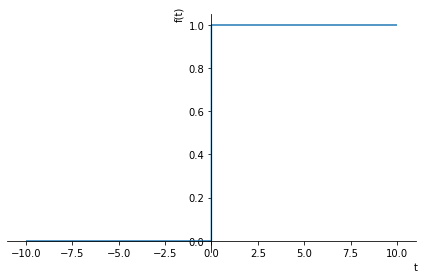

In [3]:
plot(Heaviside(t))

Look at the difference between the function (blue line) and the inverse laplace transform we obtained (red line), which contains the unit step to force it to zero for $t<0$.



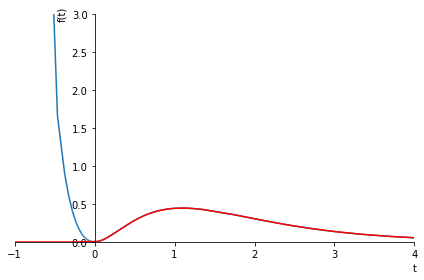

In [29]:
f = 3*exp(-t)-6*exp(-2*t)+3*exp(-3*t)
p = plot(f, itf26, xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p.show()

And to the Example 2.7.

In [51]:
# Example 2.7, p. 18
# F(s) = (s + 5)/(s**2 + 4*s + 13)
tf27 = TransferFunction(s + 5, s**2 + 4*s + 13, s)
tf27

TransferFunction(s + 5, s**2 + 4*s + 13, s)

In [53]:
pftf27 = apart(tf27.args[0]/tf27.args[1], full=True).doit()
pftf27

(1/2 + I/2)/(s + 2 + 3*I) + (1/2 - I/2)/(s + 2 - 3*I)

In [55]:
inverse_laplace_transform(pftf27, s, t)

(sin(3*t) + cos(3*t))*exp(-2*t)*Heaviside(t)

And to the Example 2.9.

In [20]:
# Example 2.9, p. 18
# F(s) = 2/[(s + 1)**3*(s + 2)]
tf29 = TransferFunction(2, (s + 1)**3*(s + 2), s)
tf29

TransferFunction(2, (s + 1)**3*(s + 2), s)

In [21]:
pftf29 = apart(tf29.args[0]/tf29.args[1])
pftf29

-2/(s + 2) + 2/(s + 1) - 2/(s + 1)**2 + 2/(s + 1)**3

In order to obtain the inverse Laplace transform, let's do in another way.

In [28]:
itf29 = 0
for term in pftf29.args:
  itf29 += inverse_laplace_transform(term, s, t)
itf29.simplify()

((t**2 - 2*t + 2)*exp(t) - 2)*exp(-2*t)*Heaviside(t)

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "
/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


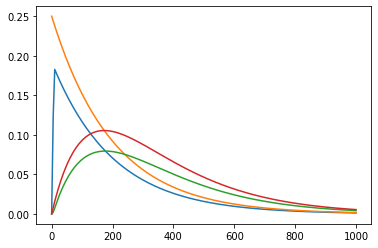

In [72]:
# Hint (14), p. 42
# Python and MATLAB codes
tau1=200                     # tau1=200;
G1=tf(1, [tau1, 1])          # G1=tf(1,[tau1 1]);  % Transfer function of the first vessel
pulselength=10               # pulselength=10;     % Generate a vector to represent the
                             #                     % rectangular pulse
delt=5                       # delt=5;             % (We are jumping ahead. These steps
                             #                     % are explained
t=linspace(0,                # t=0:delt:1000;      % in MATLAB Session 3.)
           1000, 
           int(1000/delt))   
u=0*t                        # u=zeros(size(t));
u[0:int(pulselength/delt)]=5 # u(1:pulselength/delt+1)=5;
y11=lsim(G1, u, t)[0]        # lsim(G1,u,t);       % The response of the rectangular pulse
                             # hold
y12=50*impulse(G1, t)[0]     # y=50*impulse(G1,t); % Add on the impulse response
plt.plot(t, y11, t, y12)     # plot(t,y)
tau2=150                     # tau2=150;           % Generate the transfer function for
                             #                     % both vessels
G2=tf(1, [tau2, 1])          # G2=tf(1,[tau2 1]);
G=G1*G2                      # G=G1*G2;
y21=lsim(G, u, t)[0]         # lsim(G,u,t)         % Add the responses
y22=50*impulse(G, t)[0]      # y=50*impulse(G,t);
plt.plot(t, y21, t, y22)     # plot(t,y)